In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'stixgeneral'

In [5]:
def gauss(x, a, sigma, mu): 
    y = a*np.exp(-(x-mu)**2/2/sigma**2)
    return y

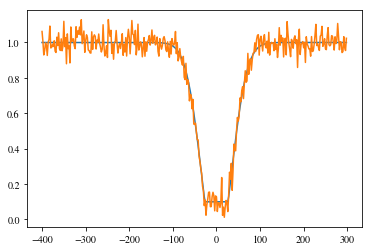

In [14]:
plt.plot(x, 1-y3)
plt.plot(x, 1-y3_n)

In [15]:
x = np.mgrid[-400:300:2]
noise = np.random.normal(loc=0.0, scale=0.05, size=x.size)

y1 = gauss(x, 0.4, 30, -150)
y1_n = y1 + noise 
y1_spec = 1 - y1 
y1_spec_n = 1-y1_n

y2 = gauss(x, 0.5, 15, 10)
y2_n = y2 + noise 
y2_spec = 1 - y2 
n2_spec_n = 1 - y2_n

y3 = gauss(x, 1.2, 35, 0)
y3[y3>0.9] = 0.9 
y3_n = y3+noise 

y3_spec = 1 - y3 
y3_spec_n = 1 - y3_n

full_spec = 1 - (y1_n + y3_n)


In [20]:
# let's smooth the corner of y3
from scipy.ndimage import gaussian_filter 
sm_y3_spec = gaussian_filter(y3_spec, 5)

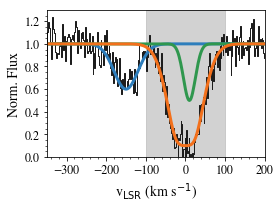

In [21]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(111)
ax.step(x, full_spec, color=plt.cm.Greys(0.9), lw=1)
ax.plot(x, y1_spec, color=plt.cm.Blues(0.7), lw=3, label='Observable CGM (HVC)')
ax.plot(x, y2_spec, color=plt.cm.Greens(0.7), lw=3, label='Hidden CGM')
ax.plot(x, sm_y3_spec, color=plt.cm.Oranges(0.6), lw=3, label='nearby ISM')
ax.set_ylim(0, 1.3)
ax.set_xlim(-350, 200)
ax.minorticks_on()
ax.fill_between([-100, 100], 0, 1.3, color=plt.cm.Greys(0.4), alpha=0.6)
ax.set_xlabel(r"v$_{\rm LSR}$ (km s$^{-1}$)", fontsize=14)
ax.set_ylabel('Norm. Flux', fontsize=14)
# ax.legend()
for tick in ax.xaxis.get_major_ticks(): 
    tick.label.set_fontsize(12)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
fig.tight_layout()
fig.savefig("figs_for_paper/hidden_hvc_facked_spec.pdf")